In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

In [14]:
# Load the dataset
df = pd.read_csv(r'C:\Users\40108378\OneDrive - Anheuser-Busch InBev\Hedging Commodities\price-forecast-model\data\SAFEX_wheat_friday_df.csv')

# Display the first few rows of the dataset
df.head()

,Date,Price,volume,open_price,USDZAR Curncy,W 1 Comdty,W 2 Comdty,WZ1 Comdty,YW1 Comdty,Price_diff,year_month,max_temp,precipitation,avg_temp,min_temp,active_flag,day
0,2015-03-27,3800.0,139.0,3780.0,12.0438,507.75,512.00,2634.0,2422.0,5.0,201503.0,79.0489,2.195833,68.6914,58.31695,0,Friday
1,2015-04-03,3800.0,1.0,3800.0,11.9878,528.50,529.50,2608.0,2422.0,-30.0,201504.0,73.7244,0.994166,62.3620,50.99110,1,Friday
2,2015-04-10,3800.0,1.0,3800.0,11.9878,528.50,529.50,2608.0,2422.0,-30.0,201504.0,73.7244,0.994166,62.3620,50.99110,1,Friday
3,2015-04-17,3700.0,15.0,3705.0,12.0675,494.50,489.25,2557.0,2379.0,-40.0,201504.0,73.7244,0.994166,62.3620,50.99110,0,Friday
4,2015-04-24,3790.0,205.0,3750.0,12.1222,486.00,488.50,2576.0,2384.0,57.0,201504.0,73.7244,0.994166,62.3620,50.99110,0,Friday


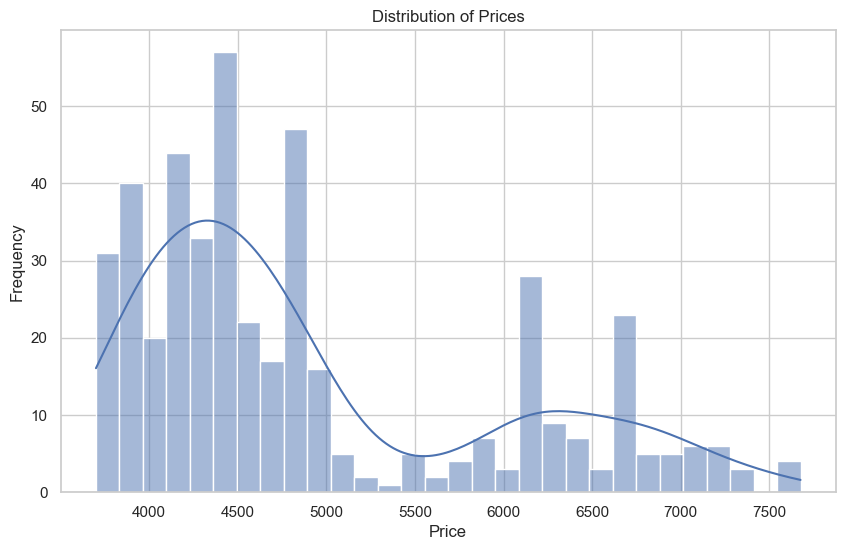

In [15]:
# Exploratory Data Analysis
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

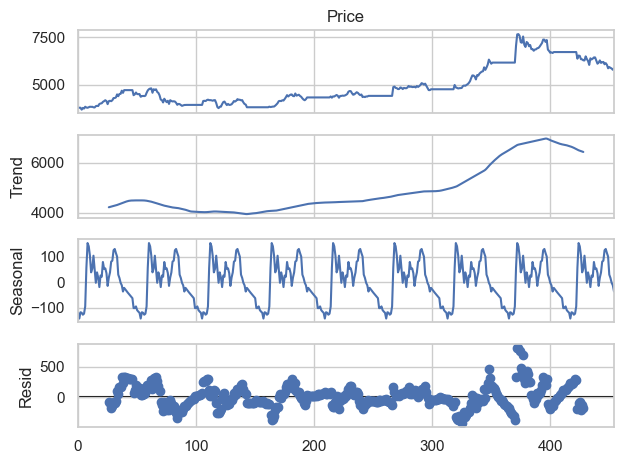

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the Date column is in datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])


# Perform ETS decomposition
result = seasonal_decompose(df['Price'], model='additive', period=52)  # Assuming weekly seasonality

# Plot the decomposition
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import timedelta
# Initialize the starting point for the loop
current_date = pd.Timestamp('2023-05-05')
horizon = 32  # Number of weeks to extrapolate

# Loop until the end of December 2023
while current_date <= pd.Timestamp('2023-12-31'):
    data_2022_2023 = df[df['Date'] < current_date]
    y_test = df[df['Date'] > current_date]['Price'].dropna()
    # Extract the target column
    target_series = data_2022_2023['Price'].dropna()

    # Fit the ETS model
    ets_model = ExponentialSmoothing(target_series, trend='add', seasonal='mul', seasonal_periods=52).fit()

    # Forecast the next 12 periods
    forecast = ets_model.forecast(steps=horizon)
    print(f"Forecast for {current_date}:")
    print(forecast)
    forecast = pd.DataFrame(forecast, columns=['Date','Forecast'])
    mse = mean_squared_error(y_test, forecast['Forecast'])
    mape = mean_absolute_percentage_error(y_test,forecast['Forecast'])
    # Print the results
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Percentage Error: {mape*100:.2f}%")
    current_date += timedelta(weeks=1)
    horizon -= 1



print(forecast)

Forecast for 2023-05-05 00:00:00:
423    7071.502875
424    7227.914563
425    7219.395666
426    7193.020480
427    7063.623185
428    7091.503070
429    7151.484857
430    7044.291455
431    6982.650059
432    7056.865508
433    7027.934373
434    6983.880145
435    7049.082011
436    7034.084664
437    7119.830245
438    7099.322029
439    7118.718623
440    7094.326971
441    7018.591314
442    7106.495540
443    7149.382648
444    7225.993605
445    7251.794515
446    7332.773307
447    7352.041261
448    7337.451647
449    7327.487451
450    7201.291226
451    7194.374241
452    7185.141899
453    7175.552734
454    7144.421402
dtype: float64


ValueError: Shape of passed values is (32, 1), indices imply (32, 2)

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\40108378\AppData\Local\miniconda3\envs\forge\Lib\asyncio\events.py", line 84, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\40108378\AppData\Local\miniconda3\envs\forge\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\40108378\AppData\Local\miniconda3\envs\forge\Lib\asyncio\events.py", line 84, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\40108378\AppData\Local\miniconda3\envs\forge\Lib\asyncio\selector_events.p